#### Problem 1

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

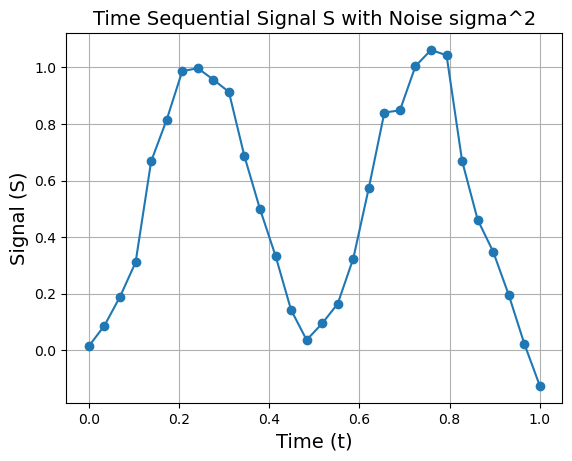

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of data points and the time period
num_points = 30
t_start = 0
t_end = 1

# Generate a sequence of equally spaced time points
t_values = np.linspace(t_start, t_end, num_points)

# Define the function g(𝜎^2) = sin^2(2𝜋𝑡) + 𝑁0,𝜎^2
def g(t, sigma_squared ):
    return np.sin(2 * np.pi * t)**2 + sigma_squared

# Generate random noise 𝜎^2 with normal distribution for each data point
sigma_squared_values = np.random.normal(0, 0.07, num_points)  # Adjust the standard deviation as needed

# Generate the signal 𝑆 by applying g(𝜎^2) to each data point
S = g(t_values, sigma_squared_values)

# Plot the generated signal 𝑆
plt.plot(t_values, S, marker='o', linestyle='-')
plt.xlabel('Time (t)',fontsize=14)
plt.ylabel('Signal (S)',fontsize=14)
plt.title('Time Sequential Signal S with Noise sigma^2',fontsize=14)
plt.grid(True)
plt.show()


##### (a) Fit the signal with a polynomial bases of dimensions 𝑘 = [2 5 10 14 18]. Plot the 5 curves superimposed over a plot of the data points. 

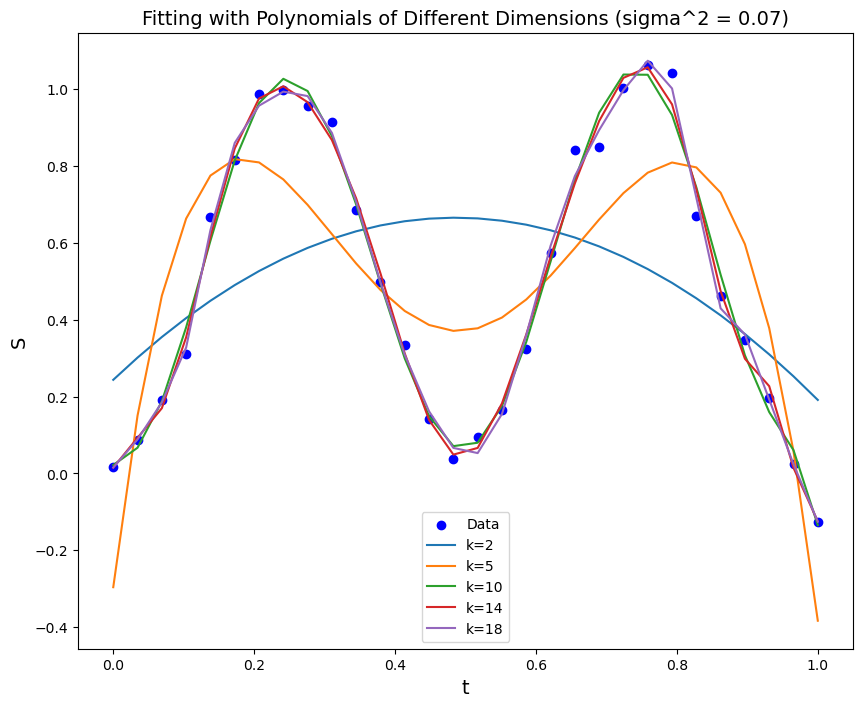

In [51]:
import matplotlib.pyplot as plt

def cal_R_squared(X,y):  
    # R squared = 1- SSE/SST
    SSE = 0
    SST = 0
    y_mean = 0
    R_squared = 0
    pred = regressor.predict(X)
    for i in range(0,len(X)):
        # calculate SSE
        add = y[i]-pred[i]
        # print(y[i],'-',pred[i],'=',add)
        SSE = SSE + add**2
        # print('SSE=',SSE)
        # calculate y true data mean      
        y_mean = y_mean + y[i]
    y_mean = y_mean / len(y)
    for i in range(0,len(X)):
        add = y[i]-y_mean
        SST = SST + add**2
    R_squared = 1-(SSE/SST)
    return R_squared, SSE

# Polynomial dimensions to try
k_values = [2, 5, 10, 14, 18]

plt.figure(figsize=(10,8))
# Plot the original data points
plt.scatter(t_values, S, label='Data', color='b', marker='o')

# Fit polynomials for each dimension and plot the curves
for k in k_values:
    
    # Create a polynomial function using the coefficients
    regressor = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())
    t_values = t_values.reshape(-1,1)
    S = S.reshape(-1,1)
    regressor.fit(t_values, S)

    # Calculate the corresponding values of the fitted polynomial
    fitted_values = regressor.predict(t_values)
    
    # Plot the fitted curve
    plt.plot(t_values, fitted_values, label=f'k={k}')

# Add labels and legend
plt.xlabel('t',fontsize=14)
plt.ylabel('S',fontsize=14)
plt.legend(loc ='lower center')
plt.title('Fitting with Polynomials of Different Dimensions (sigma^2 = 0.07)',fontsize=14)

# Show the plot
plt.show()


##### (b) Let the 𝑒𝑘(𝑆) denote the mean squared training error of the fitting of the data set 𝑆 with polynomial basis of dimension 𝑘 . Plot the log of the training error 𝑒𝑘(𝑆)versus the poynomial dimension 𝑘 = 1,…,18. 

[0.12448916 0.11579022 0.11577673 0.04484226 0.04476998 0.00554544
 0.0054953  0.00328826 0.00320251 0.00251829 0.00220986 0.00220712
 0.00175589 0.00173689 0.0016279  0.00156834 0.00142561 0.00119282]


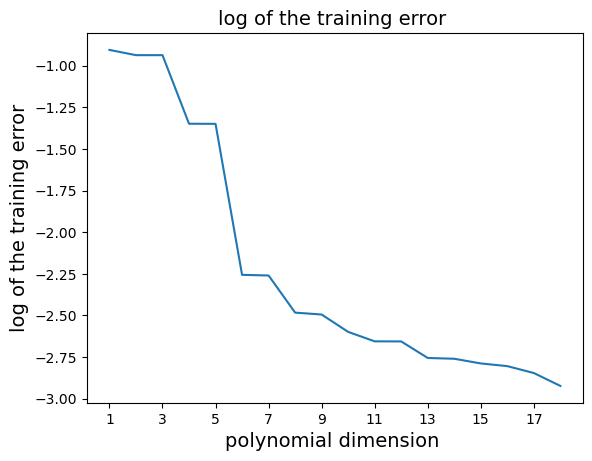

In [43]:
SSE_train=np.zeros(18)
for k in range(1,19,1):
    # Create a polynomial function using the coefficients
    regressor = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())
    t_values = t_values.reshape(-1,1)
    S = S.reshape(-1,1)
    regressor.fit(t_values, S)

    # Calculate the corresponding values of the fitted polynomial  
    fitted_values = regressor.predict(t_values)
    R_squared,SSE_train[k-1] = cal_R_squared(t_values,S)

SSE_train=SSE_train/len(S)
plt.plot(np.arange(1,19),np.log10(SSE_train))
plt.xlabel('polynomial dimension ',fontsize=14)
plt.ylabel('log of the training error',fontsize=14)
plt.title('log of the training error ',fontsize=14)
plt.xticks(np.arange(1,19,2))
# plt.grid(True)
print(SSE_train)

##### (c) Let 𝑒𝑘(𝑆,𝑇) denote the mean squared “test” error of the test signal 𝑇 on the polynomial of dimension 𝑘 fitted from training set 𝑆. Plot the log of the test error versus the polynomial dimension 𝑘 = 1,…,18. 

[0.13108665 0.12637583 0.12655641 0.04979894 0.05000968 0.01024956
 0.01044903 0.00754737 0.00749377 0.00750479 0.00770904 0.00769282
 0.00830356 0.00884574 0.00873248 0.00844415 0.01200595 0.01274996]


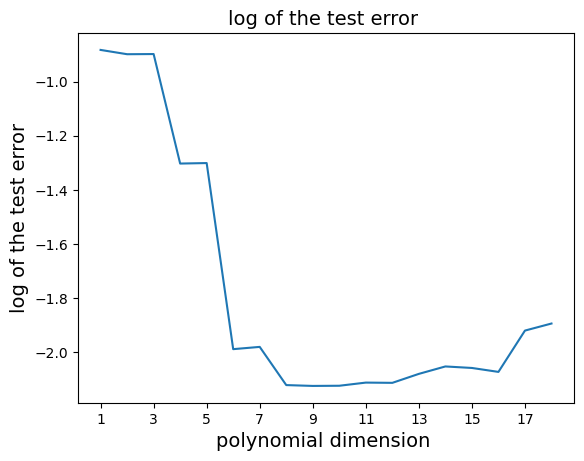

In [46]:
# Set the number of data points and the time period
num_points = 1000
t_start = 0
t_end = 1

# Generate a sequence of equally spaced time points
t_1000 = np.linspace(t_start, t_end, num_points)
# t_1000 = t_1000.reshape(-1,1)
# Define the function g(𝜎^2) = sin^2(2𝜋𝑡) + 𝑁0,𝜎^2
def g(t, sigma_squared ):
    return np.sin(2 * np.pi * t)**2 + sigma_squared

# Generate random noise 𝜎^2 with normal distribution for each data point
sigma_squared_values = np.random.normal(0, 0.07, num_points)  # Adjust the standard deviation as needed

# Generate the signal 𝑆 by applying g(𝜎^2) to each data point
S_1000 = g(t_1000, sigma_squared_values)

t_reshape = t_1000.reshape(-1,1)
SSE_test=np.zeros((18))
for k in range(1,19,1):
    # Create a polynomial function using the coefficients
    regressor = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())
    t_values = t_values.reshape(-1,1)
    S = S.reshape(-1,1)
    regressor.fit(t_values, S)

    # Calculate the corresponding values of the fitted polynomial
    
    fitted_values = regressor.predict(t_reshape)
    R_squared,SSE_test[k-1] = cal_R_squared(t_reshape,S_1000) 
SSE_test = SSE_test/ len(S_1000)

plt.plot(np.arange(1,19),np.log10(SSE_test))
plt.xlabel('polynomial dimension ',fontsize=14)
plt.ylabel('log of the test error',fontsize=14)
plt.title('log of the test error ',fontsize=14)
plt.xticks(np.arange(1,19,2))
print(SSE_test)

##### (d) Compare the training error with the test error.  Describe what you observe.

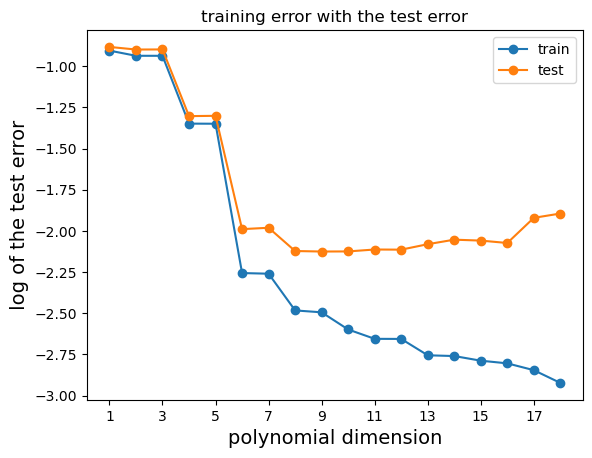

In [54]:
plt.plot(np.arange(1,19), np.log10(SSE_train), marker='o', linestyle='-',label='train')
plt.plot(np.arange(1,19), np.log10(SSE_test), marker='o', linestyle='-',label='test')
plt.xlabel('polynomial dimension',fontsize=14)
plt.ylabel(' log of the test error ',fontsize=14)
plt.title('training error with the test error')
plt.xticks(np.arange(1,19,2))
plt.legend()
plt.show()


#### Problem 2

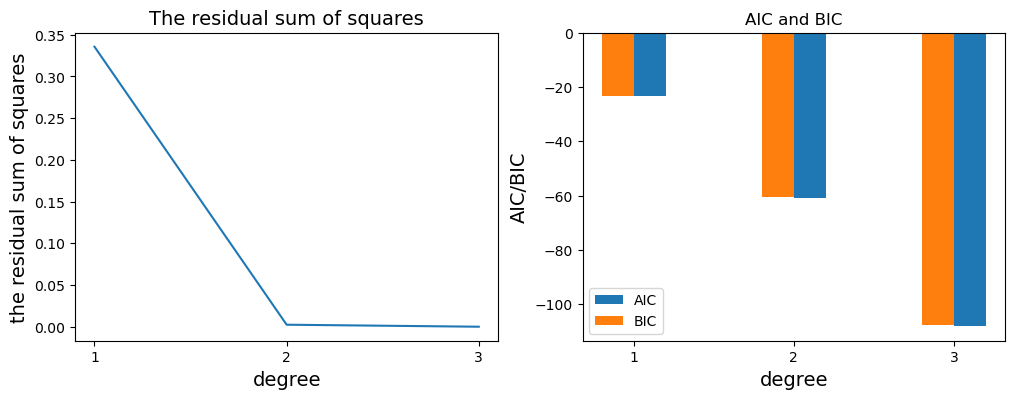

In [35]:
# Polynomial Regression of 1 order
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def cal_R_squared(X,y):  
    # R squared = 1- SSE/SST
    SSE = 0
    SST = 0
    y_mean = 0
    R_squared = 0
    pred = regressor.predict(X)
    for i in range(0,len(X)):
        # calculate SSE
        add = y[i]-pred[i]
        # print(y[i],'-',pred[i],'=',add)
        SSE = SSE + add**2
        # print('SSE=',SSE)
        # calculate y true data mean      
        y_mean = y_mean + y[i]
    y_mean = y_mean / len(y)
    for i in range(0,len(X)):
        add = y[i]-y_mean
        SST = SST + add**2
    R_squared = 1-(SSE/SST)
    return R_squared, SSE
# AIC
def AIC(N,SSE,k):
    AIC = N*(np.log(SSE/N))+2*k
    return AIC 
# BIC
def BIC(N,SSE,k):
    AIC = N*(np.log(SSE/N))+np.log(N)*k
    return AIC 
# data
X = np.array([0.2,0.3,0.6,0.9,1.1,1.3,1.4,1.6])
y = np.array([0.050446,0.098426,0.3327,0.7266,1.0972,1.5697,1.8487,2.5015])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# initialize array
SSE_array=np.zeros((3,1))
AIC_array=np.zeros((3,1))
BIC_array=np.zeros((3,1))
for i  in range(1,4):
    # model
    regressor = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    regressor.fit(X, y)

    # sum of residual squares
    R_squared,SSE = cal_R_squared(X,y)
    SSE_array[i-1]=float(SSE)
    
    ##plot regression
    # plt.plot(X, regressor.predict(X), color = 'blue')
    # plt.scatter(X, y, color = 'red')
    # plt.tick_params(labelsize=12)
    # plt.title("Polynomial Regression (degree=1)",fontsize=14)
    # plt.xlabel('X',fontsize=14)
    # plt.ylabel('y',fontsize=14)
# AIC BIC
for i in range(1,4):
    AIC_array[i-1] = AIC(len(X),SSE_array[i-1],i)
    BIC_array[i-1] = BIC(len(X),SSE_array[i-1],i)
# print(SSE_array)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot([[1],[2],[3]],SSE_array)
plt.xticks([1,2,3])
plt.ylabel('the residual sum of squares',fontsize=14)
plt.xlabel('degree',fontsize=14)
plt.title("The residual sum of squares",fontsize=14)

plt.subplot(122)
plt.bar(np.arange(1,4,1),AIC_array.flatten(),width=0.2,align='edge',label='AIC')
plt.bar(np.arange(0.9,3.9,1),BIC_array.flatten(),width=0.2,label='BIC')
plt.xticks([1,2,3])
plt.title('AIC and BIC')
plt.xlabel('degree',fontsize=14)
plt.ylabel('AIC/BIC',fontsize=14)
plt.legend()
plt.show()


In [2]:




print(AIC_array)
print(BIC_array)


[[ -23.36994223]
 [ -60.84061575]
 [-108.07113666]]
[[ -23.29050068]
 [ -60.68173267]
 [-107.83281204]]


### problem 1

score3: 0.9919828765383678
score2: 0.8968626068886472


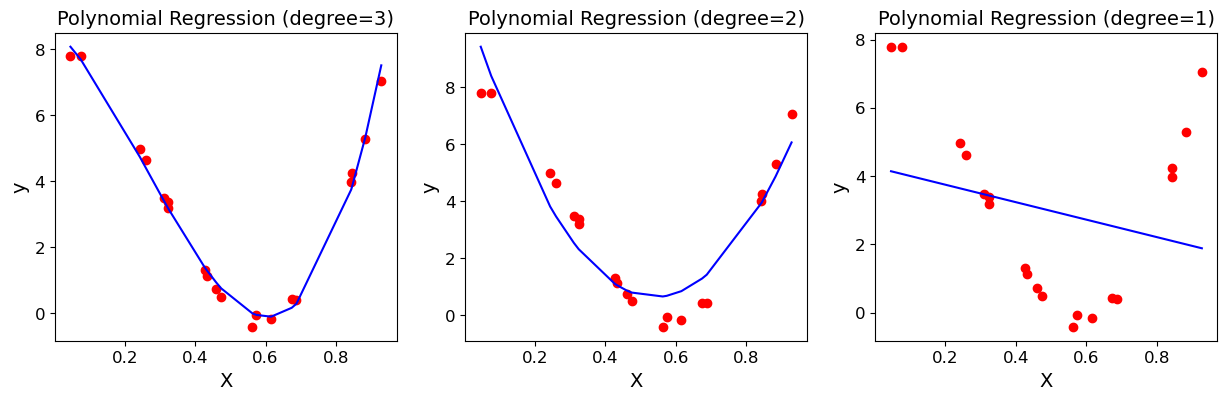

score1: 0.05996468807713573
cal_score: [0.05996469]


In [144]:
#Polynomial Regression of 3 order
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# model of 3 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
regressor.fit(X, y)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.scatter(X, y, color = 'red')
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression (degree=3)",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
print('score3:',regressor.score(X,y))

# model of 2 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
regressor.fit(X, y)
plt.subplot(132)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.scatter(X, y, color = 'red')
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression (degree=2)",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
print('score2:',regressor.score(X,y))

# model of 1 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
regressor.fit(X, y)
plt.subplot(133)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.scatter(X, y, color = 'red')
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression (degree=1)",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.show()
print('score1:',regressor.score(X,y))
        
# 只是計算看看R squared是否和regressor.score()一致
def cal_R_squared(X,y):
    # R squared = 1- SSE/SST
    SSE = 0
    SST = 0
    y_mean = 0
    R_squared = 0
    pred = regressor.predict(X)
    for i in range(0,20):
        # calculate SSE
        add = y[i]-pred[i]
        SSE = SSE + add**2
        # calculate y true data mean
        y_mean = y_mean + y[i]
    y_mean = y_mean / len(y)
    for i in range(0,20):
        add = y[i]-y_mean
        SST = SST + add**2
    R_squared = 1-(SSE/SST)
    return R_squared
print('cal_score:',cal_R_squared(X,y))

max =  0.4270845391264251
min =  -0.46528323331885435


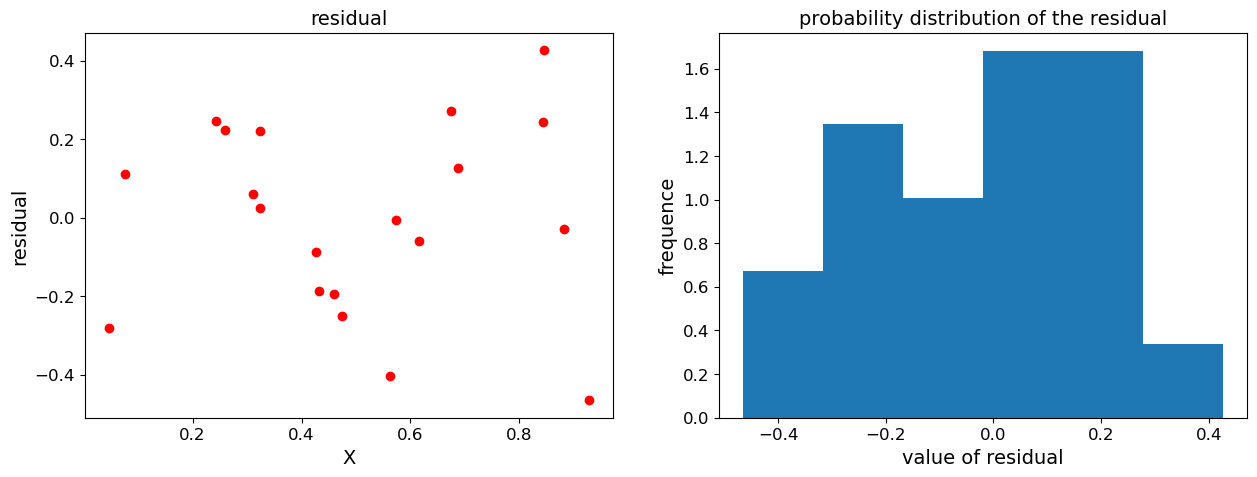

In [134]:
# 觀察residual是否跟x無關>>independent
regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
regressor.fit(X, y)
def residual(X,y):
    residual = []
    pred = regressor.predict(X)
    for i in range(0,20):
        residual.append(float(y[i]-pred[i]))
    return residual

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X,residual(X,y), color = 'red')
plt.tick_params(labelsize=12)
plt.title("residual",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('residual',fontsize=14)

# 觀察殘差直方圖是否呈常態分佈 # https://online.stat.psu.edu/stat501/lesson/4/4.6
# http://140.116.77.14/mate/lab2/Course/982sta/ch4%E5%B7%A5%E7%A8%8B%E7%B5%B1%E8%A8%88(98).pdf
print('max = ',np.array(residual(X,y)).max())
print('min = ',np.array(residual(X,y)).min())

A = np.array(residual(X,y))
plt.subplot(122)
plt.hist(A, bins='auto',density=True)
plt.tick_params(labelsize=12)
plt.title("probability distribution of the residual",fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.show()


### problem 2

### problem 3

#### (a) Generate a scatter plot of the yields vs maturity. Comment on the figures

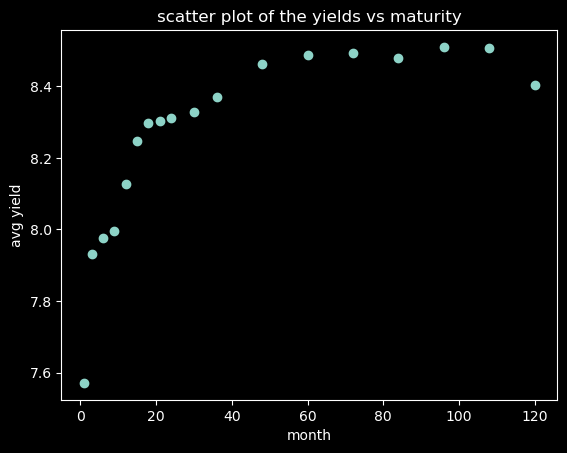

In [25]:
import matplotlib.pyplot as plt
import numpy as np
month = np.array([1, 3, 6, 9, 12, 15, 18, 21, 24, 30, 36, 48, 60, 72, 84, 96, 108, 120])
list_yield = np.array([7.571, 7.931, 7.977, 7.996, 8.126, 8.247, 8.298, 8.304, 8.311, 8.327, 8.369, 8.462, 8.487, 8.492, 8.479, 8.510, 8.507, 8.404])
plt.scatter(month, list_yield)
plt.xlabel('month')
plt.ylabel('avg yield')
plt.title('scatter plot of the yields vs maturity')
plt.show()

#### (b) You want to fit a polynomial regression model to the data. Since you don't know the order you need, you fit six polynomial models, with orders from 1 to 6. Plot the 𝑅^2 vs the polynomial order 𝑘. Comment on the result.

score1: 0.5386415469926811
score2: 0.840093213993114
score3: 0.907182472094198
score4: 0.9488539227039009
score5: 0.9565264503055062
score6: 0.9665523553979603


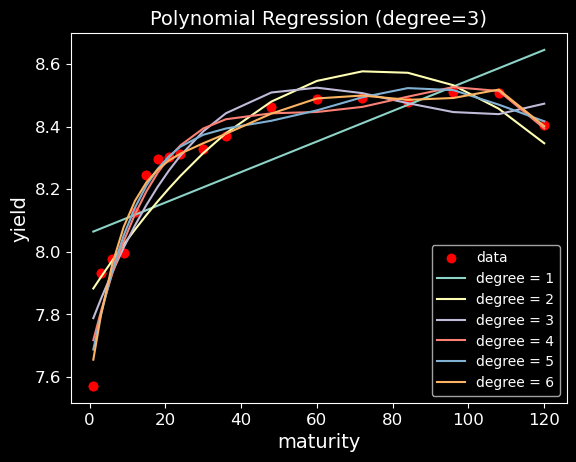

In [48]:
#順便畫的
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = month.reshape(-1, 1)
y = list_yield.reshape(-1, 1)

# model of 1 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 1), LinearRegression())
regressor.fit(X, y)
score_list = []
plt.scatter(X, y, color = 'red', label = "data")
plt.plot(X, regressor.predict(X), label = "degree = 1")
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression",fontsize=14)
plt.xlabel('maturity',fontsize=14)
plt.ylabel('yield',fontsize=14)
score_list.append(regressor.score(X,y))
print('score1:',regressor.score(X,y))

# model of 2 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 2")
score_list.append(regressor.score(X,y))
print('score2:',regressor.score(X,y))

# model of 3 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 3")
score_list.append(regressor.score(X,y))
print('score3:',regressor.score(X,y))

# model of 4 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 4")
plt.scatter(X, y, color = 'red')
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression (degree=3)",fontsize=14)
plt.xlabel('maturity',fontsize=14)
plt.ylabel('yield',fontsize=14)
score_list.append(regressor.score(X,y))
print('score4:',regressor.score(X,y))

# model of 5 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 5")
score_list.append(regressor.score(X,y))
print('score5:',regressor.score(X,y))

# model of 6 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 6")
score_list.append(regressor.score(X,y))
print('score6:',regressor.score(X,y))
plt.legend()
plt.show()

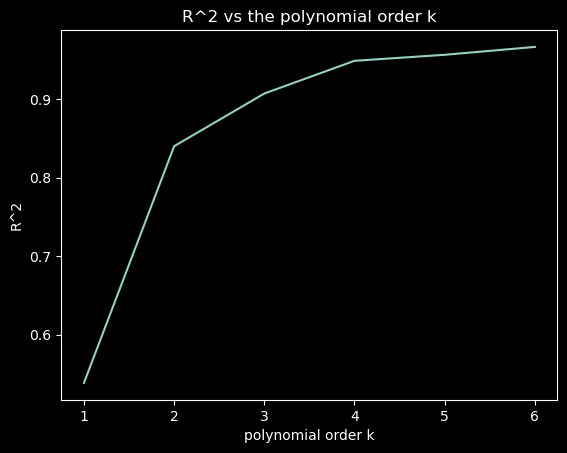

In [38]:
plt.plot(np.arange(1,7), score_list)
plt.xlabel('polynomial order k')
plt.ylabel('R^2')
plt.title('R^2 vs the polynomial order k')
plt.show()

#### (c) For the 4th-order polynomial model, draw a residual plot (vs maturity). Comment on it.

score4: 0.9488539227039009


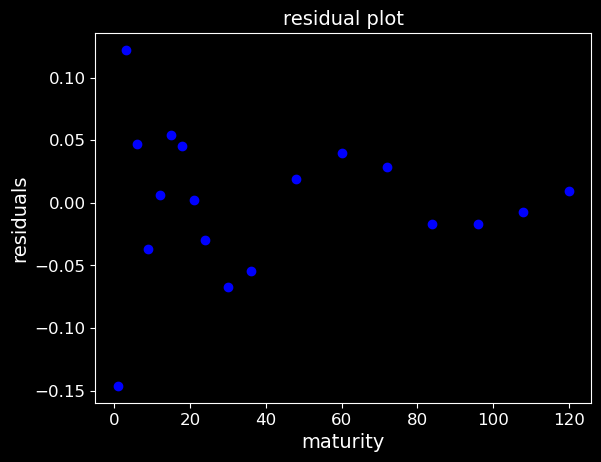

In [49]:
# model of 4 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
regressor.fit(X, y)
residuals = y-regressor.predict(X)

plt.scatter(X, residuals, color = 'blue')
plt.tick_params(labelsize=12)
plt.title("residual plot",fontsize=14)
plt.xlabel('maturity',fontsize=14)
plt.ylabel('residuals',fontsize=14)
score_list.append(regressor.score(X,y))
print('score4:',regressor.score(X,y))

#### (d) Draw a histogram and a quantile-quantile (Q-Q) plot of the residuals. Comment on it.